# Test notebook 

Just to check how it all works here

In [5]:
import sys
sys.path.append('..')
import welltest.functions as wt
import matplotlib.pyplot as plt

import numpy as np

In [2]:
pdlist = np.linspace(1,10,100)
print(wt.p_from_pd_atma(pdlist))

[245.5816     245.17992727 244.77825455 244.37658182 243.97490909
 243.57323636 243.17156364 242.76989091 242.36821818 241.96654545
 241.56487273 241.1632     240.76152727 240.35985455 239.95818182
 239.55650909 239.15483636 238.75316364 238.35149091 237.94981818
 237.54814545 237.14647273 236.7448     236.34312727 235.94145455
 235.53978182 235.13810909 234.73643636 234.33476364 233.93309091
 233.53141818 233.12974545 232.72807273 232.3264     231.92472727
 231.52305455 231.12138182 230.71970909 230.31803636 229.91636364
 229.51469091 229.11301818 228.71134545 228.30967273 227.908
 227.50632727 227.10465455 226.70298182 226.30130909 225.89963636
 225.49796364 225.09629091 224.69461818 224.29294545 223.89127273
 223.4896     223.08792727 222.68625455 222.28458182 221.88290909
 221.48123636 221.07956364 220.67789091 220.27621818 219.87454545
 219.47287273 219.0712     218.66952727 218.26785455 217.86618182
 217.46450909 217.06283636 216.66116364 216.25949091 215.85781818
 215.45614545 2

Нарисуем распределение давления в пласте при запуске и остановке скважины. Начнем с запуска скважины - нарисуем график изменения давления в пласте для разных моментов времени

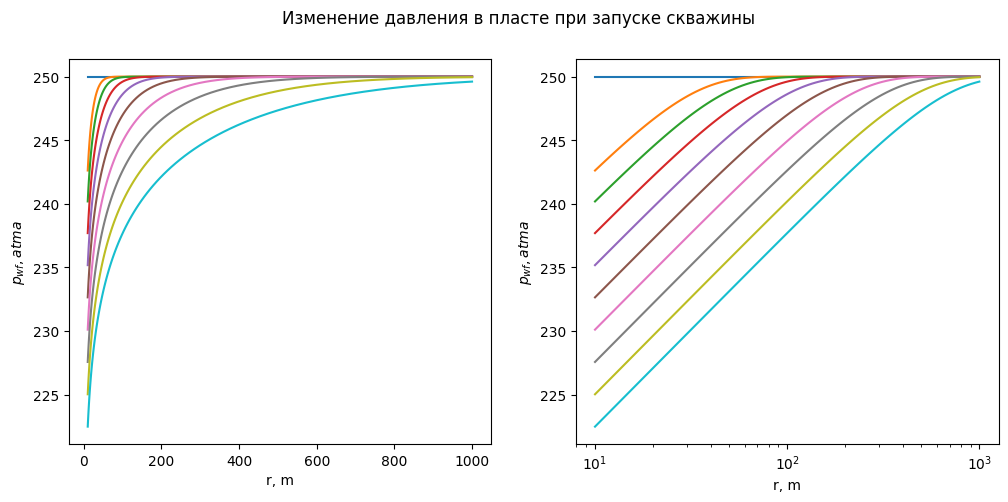

In [7]:
k = 10   # проницаемость
q = 30   # дебит
r_arr = np.logspace(1, 3, 100)
t_arr = np.logspace(-1, 2, 10)
t_arr[0] = 0
t_prod = 100

tv, rv = np.meshgrid(wt.td_from_t(t_arr),wt.rd_from_r(r_arr))
pd_arr =wt.pd_ei(tv, rd=rv)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12,5])
fig.suptitle('Изменение давления в пласте при запуске скважины')
ax1.plot(r_arr, wt.p_from_pd_atma(pd_arr, k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, pi_atma=250))
ax1.set_label(t_arr)
ax1.set_xlabel('r, m')
ax1.set_ylabel('$p_{wf}, atma$')

ax2.plot(r_arr,wt.p_from_pd_atma(pd_arr, k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, pi_atma=250))
ax2.set_xscale('log')
ax2.set_xlabel('r, m')
ax2.set_ylabel('$p_{wf}, atma$')
plt.show()

Дальше нарисуем графики изменения давления в пласте для различных моментов времени после остановки скважины

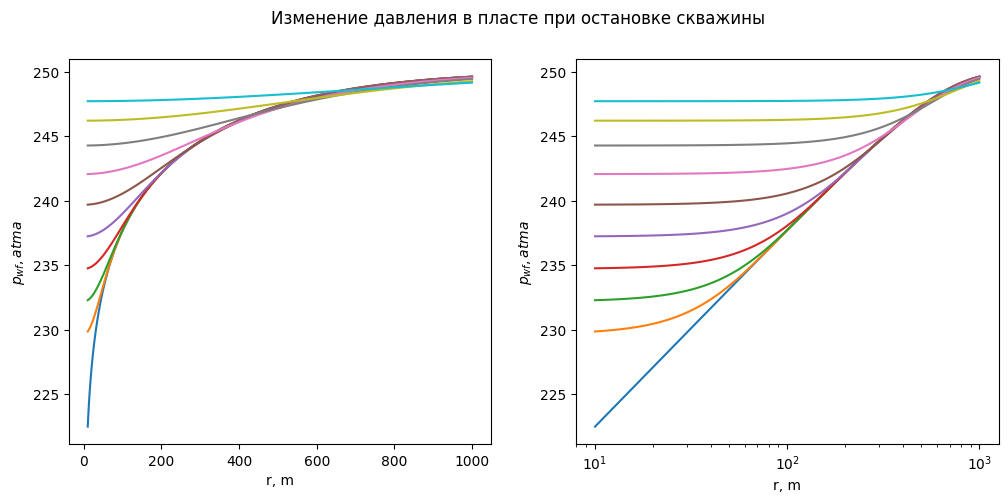

In [8]:
pd_arr_bu =wt.pd_ei(tv + wt.td_from_t(t_prod), rd=rv) - wt.pd_ei(tv, rd=rv)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12,5])
fig.suptitle('Изменение давления в пласте при остановке скважины')
ax1.plot(r_arr, wt.p_from_pd_atma(pd_arr_bu, k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, pi_atma=250))
ax1.set_label(t_arr)
ax1.set_xlabel('r, m')
ax1.set_ylabel('$p_{wf}, atma$')

ax2.plot(r_arr,wt.p_from_pd_atma(pd_arr_bu, k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, pi_atma=250))
ax2.set_xscale('log')
ax2.set_xlabel('r, m')
ax2.set_ylabel('$p_{wf}, atma$')
plt.show()